# Librairie

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data

In [ ]:
data = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'),
                   ['2016_01.csv', '2016_02.csv', '2016_03.csv','2016_04.csv','2016_05.csv','2016_06.csv','2016_07.csv','2016_08.csv','2016_09.csv','2016_10.csv','2016_11.csv','2016_12.csv']))

In [ ]:
data

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,4.0,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460944,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7703A,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460945,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7815L,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460946,2016,4,12,31,6,2016-12-31,WN,19393,WN,N967WN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460947,2016,4,12,31,6,2016-12-31,WN,19393,WN,N271LV,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Nettoyage et analyse de base

## Supprésion de colonnes

In [ ]:
features_potentiel = [
    'ARR_DELAY_NEW','YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
    'UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME',
    'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID', 'DEST_CITY_NAME',
    'DEST_STATE_ABR', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE'
]

data = data[features_potentiel]

data.head()

## analyse Forme des données

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5635978 entries, 0 to 460948
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARR_DELAY_NEW      float64
 1   YEAR               object 
 2   QUARTER            object 
 3   MONTH              int64  
 4   DAY_OF_MONTH       object 
 5   DAY_OF_WEEK        object 
 6   UNIQUE_CARRIER     object 
 7   ORIGIN_AIRPORT_ID  object 
 8   ORIGIN_CITY_NAME   object 
 9   ORIGIN_STATE_ABR   object 
 10  DEST_AIRPORT_ID    object 
 11  DEST_CITY_NAME     object 
 12  DEST_STATE_ABR     object 
 13  CRS_DEP_TIME       float64
 14  CRS_ARR_TIME       float64
 15  DISTANCE           float64
dtypes: float64(4), int64(1), object(11)
memory usage: 731.0+ MB


<Axes: ylabel='count'>

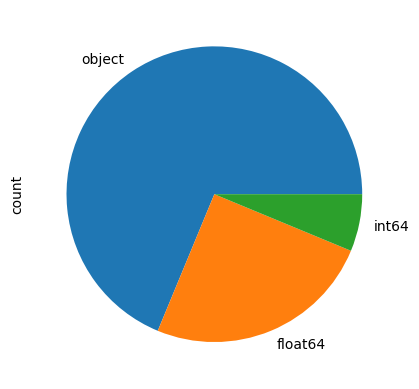

In [6]:
data.dtypes.value_counts().plot.pie()

In [7]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

YEAR                 0.000000e+00
QUARTER              0.000000e+00
MONTH                0.000000e+00
DAY_OF_MONTH         0.000000e+00
DAY_OF_WEEK          0.000000e+00
UNIQUE_CARRIER       0.000000e+00
ORIGIN_AIRPORT_ID    0.000000e+00
ORIGIN_CITY_NAME     0.000000e+00
ORIGIN_STATE_ABR     0.000000e+00
DEST_AIRPORT_ID      0.000000e+00
DEST_CITY_NAME       0.000000e+00
CRS_DEP_TIME         0.000000e+00
DEST_STATE_ABR       1.774315e-07
CRS_ARR_TIME         5.322945e-07
DISTANCE             8.871575e-07
ARR_DELAY_NEW        1.415584e-02
dtype: float64

In [8]:
missing_values = data.isnull().sum()
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)

Nombre de valeurs manquantes par colonne :
ARR_DELAY_NEW        79782
YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
ORIGIN_AIRPORT_ID        0
ORIGIN_CITY_NAME         0
ORIGIN_STATE_ABR         0
DEST_AIRPORT_ID          0
DEST_CITY_NAME           0
DEST_STATE_ABR           1
CRS_DEP_TIME             0
CRS_ARR_TIME             3
DISTANCE                 5
dtype: int64


In [9]:
target_column = 'ARR_DELAY_NEW'
missing_target_rows = data[data[target_column].isnull()]
missing_target_rows

Lignes avec des valeurs manquantes dans la colonne cible :
        ARR_DELAY_NEW  YEAR QUARTER  MONTH DAY_OF_MONTH DAY_OF_WEEK  \
72                NaN  2016       1      1           16           6   
79                NaN  2016       1      1           23           6   
80                NaN  2016       1      1           24           7   
81                NaN  2016       1      1           25           1   
102               NaN  2016       1      1           15           5   
...               ...   ...     ...    ...          ...         ...   
458681            NaN  2016       4     12           30           5   
459874            NaN  2016       4     12           31           6   
460274            NaN  2016       4     12           31           6   
460539            NaN  2016       4     12           31           6   
460642            NaN  2016       4     12           31           6   

       UNIQUE_CARRIER ORIGIN_AIRPORT_ID   ORIGIN_CITY_NAME ORIGIN_STATE_ABR  \
72       

In [12]:
data

,ARR_DELAY_NEW,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE
0,0.0,2016,1,1,6,3,AA,11298,"Dallas/Fort Worth, TX",TX,11433,"Detroit, MI",MI,1100.0,1438.0,986.0
1,0.0,2016,1,1,7,4,AA,11298,"Dallas/Fort Worth, TX",TX,11433,"Detroit, MI",MI,1100.0,1438.0,986.0
2,7.0,2016,1,1,8,5,AA,11298,"Dallas/Fort Worth, TX",TX,11433,"Detroit, MI",MI,1100.0,1438.0,986.0
3,0.0,2016,1,1,9,6,AA,11298,"Dallas/Fort Worth, TX",TX,11433,"Detroit, MI",MI,1100.0,1438.0,986.0
4,113.0,2016,1,1,10,7,AA,11298,"Dallas/Fort Worth, TX",TX,11433,"Detroit, MI",MI,1100.0,1438.0,986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460944,0.0,2016,4,12,31,6,WN,15376,"Tucson, AZ",AZ,12892,"Los Angeles, CA",CA,755.0,830.0,451.0
460945,9.0,2016,4,12,31,6,WN,15376,"Tucson, AZ",AZ,12892,"Los Angeles, CA",CA,1320.0,1355.0,451.0
460946,0.0,2016,4,12,31,6,WN,15376,"Tucson, AZ",AZ,13232,"Chicago, IL",IL,705.0,1125.0,1440.0
460947,0.0,2016,4,12,31,6,WN,15376,"Tucson, AZ",AZ,14679,"San Diego, CA",CA,1220.0,1235.0,368.0


## identification poids de la target

In [13]:
data_late = data[data['ARR_DELAY_NEW'] > 0]
data_late

,ARR_DELAY_NEW,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE
2,7.0,2016,1,1,8,5,AA,11298,"Dallas/Fort Worth, TX",TX,11433,"Detroit, MI",MI,1100.0,1438.0,986.0
4,113.0,2016,1,1,10,7,AA,11298,"Dallas/Fort Worth, TX",TX,11433,"Detroit, MI",MI,1100.0,1438.0,986.0
13,4.0,2016,1,1,19,2,AA,11298,"Dallas/Fort Worth, TX",TX,11433,"Detroit, MI",MI,1100.0,1438.0,986.0
14,4.0,2016,1,1,20,3,AA,11298,"Dallas/Fort Worth, TX",TX,11433,"Detroit, MI",MI,1100.0,1438.0,986.0
15,21.0,2016,1,1,21,4,AA,11298,"Dallas/Fort Worth, TX",TX,11433,"Detroit, MI",MI,1100.0,1438.0,986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460920,44.0,2016,4,12,31,6,WN,15304,"Tampa, FL",FL,14122,"Pittsburgh, PA",PA,1405.0,1620.0,873.0
460933,3.0,2016,4,12,31,6,WN,15370,"Tulsa, OK",OK,11292,"Denver, CO",CO,700.0,750.0,541.0
460941,6.0,2016,4,12,31,6,WN,15376,"Tucson, AZ",AZ,12889,"Las Vegas, NV",NV,1325.0,1340.0,365.0
460943,14.0,2016,4,12,31,6,WN,15376,"Tucson, AZ",AZ,12889,"Las Vegas, NV",NV,1545.0,1605.0,365.0


## Gestion outliers

In [15]:
data = pd.read_csv('data_class.csv', low_memory=False)

max_display = 50
for column in data.columns:
    value_counts = data[column].value_counts(dropna=False)
    print(f"Comptes des valeurs uniques dans la colonne '{column}':")
    print(value_counts.head(max_display))
    print("\nNombre total de valeurs uniques:", len(value_counts))
    print("-" * 50)


Comptes des valeurs uniques dans la colonne 'ARR_DELAY_NEW':
ARR_DELAY_NEW
0.0     3665684
1.0      104933
2.0       96233
3.0       89566
4.0       81919
NaN       79782
5.0       76660
6.0       70145
7.0       64720
8.0       59495
9.0       55088
10.0      51200
11.0      47519
12.0      44488
13.0      41523
14.0      38583
15.0      35714
16.0      33379
17.0      31472
18.0      29616
19.0      27823
20.0      26357
21.0      24930
22.0      23690
23.0      22519
24.0      21186
25.0      20266
26.0      19257
27.0      18255
28.0      17187
29.0      16467
30.0      15802
31.0      15139
32.0      14574
33.0      13885
34.0      13276
35.0      12766
36.0      12227
37.0      11672
38.0      11420
39.0      10939
40.0      10606
41.0      10329
42.0       9976
43.0       9611
44.0       9210
45.0       8772
46.0       8661
47.0       8353
48.0       7976
Name: count, dtype: int64

Nombre total de valeurs uniques: 1283
--------------------------------------------------
Comptes d

In [16]:
data_cleaned = data.dropna(subset=['ARR_DELAY_NEW'])

In [17]:
data_cleaned = data[data['YEAR'] != '16-03-04']

In [18]:
data_cleaned = data[data['QUARTER'] != 'EV']

In [19]:
data_cleaned = data[data['MONTH'] != '20366']

In [20]:
data_cleaned = data[data['DAY_OF_MONTH'] != 'EV']

In [21]:
data_cleaned = data[data['DAY_OF_WEEK'] != 'N707EV']

In [22]:
data_cleaned = data[data['UNIQUE_CARRIER'] != '10397']

In [23]:
data_cleaned = data[(data['ORIGIN_CITY_NAME'] != '11953') & (data['ORIGIN_CITY_NAME'] != '1829')]

In [24]:
data_cleaned = data[(data['ORIGIN_STATE_ABR'] != 1820) & (data['ORIGIN_STATE_ABR'] != '1195302')]

In [25]:
data_cleaned = data[data['DEST_AIRPORT_ID'] != 'FL']

In [26]:
data_cleaned = data[(data['DEST_CITY_NAME'] != '9.00') & (data['DEST_CITY_NAME'] != '1331')]

In [27]:
data_cleaned = data[(data['DEST_STATE_ABR'] != '54.00') & (data['DEST_STATE_ABR'] != '1328')]

In [28]:
data_cleaned = data[data['CRS_ARR_TIME'] != -1.0]

In [29]:
data_cleaned.isna().sum()

ARR_DELAY_NEW        79782
YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
ORIGIN_AIRPORT_ID        0
ORIGIN_CITY_NAME         0
ORIGIN_STATE_ABR         0
DEST_AIRPORT_ID          0
DEST_CITY_NAME           0
DEST_STATE_ABR           1
CRS_DEP_TIME             0
CRS_ARR_TIME             3
DISTANCE                 5
dtype: int64

In [30]:
data_cleaned = data_cleaned.dropna()


In [31]:
data_cleaned.isna().sum()

ARR_DELAY_NEW        0
YEAR                 0
QUARTER              0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
UNIQUE_CARRIER       0
ORIGIN_AIRPORT_ID    0
ORIGIN_CITY_NAME     0
ORIGIN_STATE_ABR     0
DEST_AIRPORT_ID      0
DEST_CITY_NAME       0
DEST_STATE_ABR       0
CRS_DEP_TIME         0
CRS_ARR_TIME         0
DISTANCE             0
dtype: int64

In [37]:
data_cleaned = pd.read_csv('data_cleaned.csv')
data_cleaned

,ARR_DELAY_NEW,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE
0,0.0,2016,1,1,6,3,AA,11298.0,"Dallas/Fort Worth, TX",TX,11433.0,"Detroit, MI",MI,1100.0,1438.0,986.0
1,0.0,2016,1,1,7,4,AA,11298.0,"Dallas/Fort Worth, TX",TX,11433.0,"Detroit, MI",MI,1100.0,1438.0,986.0
2,7.0,2016,1,1,8,5,AA,11298.0,"Dallas/Fort Worth, TX",TX,11433.0,"Detroit, MI",MI,1100.0,1438.0,986.0
3,0.0,2016,1,1,9,6,AA,11298.0,"Dallas/Fort Worth, TX",TX,11433.0,"Detroit, MI",MI,1100.0,1438.0,986.0
4,113.0,2016,1,1,10,7,AA,11298.0,"Dallas/Fort Worth, TX",TX,11433.0,"Detroit, MI",MI,1100.0,1438.0,986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5556190,0.0,2016,4,12,31,6,WN,15376.0,"Tucson, AZ",AZ,12892.0,"Los Angeles, CA",CA,755.0,830.0,451.0
5556191,9.0,2016,4,12,31,6,WN,15376.0,"Tucson, AZ",AZ,12892.0,"Los Angeles, CA",CA,1320.0,1355.0,451.0
5556192,0.0,2016,4,12,31,6,WN,15376.0,"Tucson, AZ",AZ,13232.0,"Chicago, IL",IL,705.0,1125.0,1440.0
5556193,0.0,2016,4,12,31,6,WN,15376.0,"Tucson, AZ",AZ,14679.0,"San Diego, CA",CA,1220.0,1235.0,368.0


# Visualiation

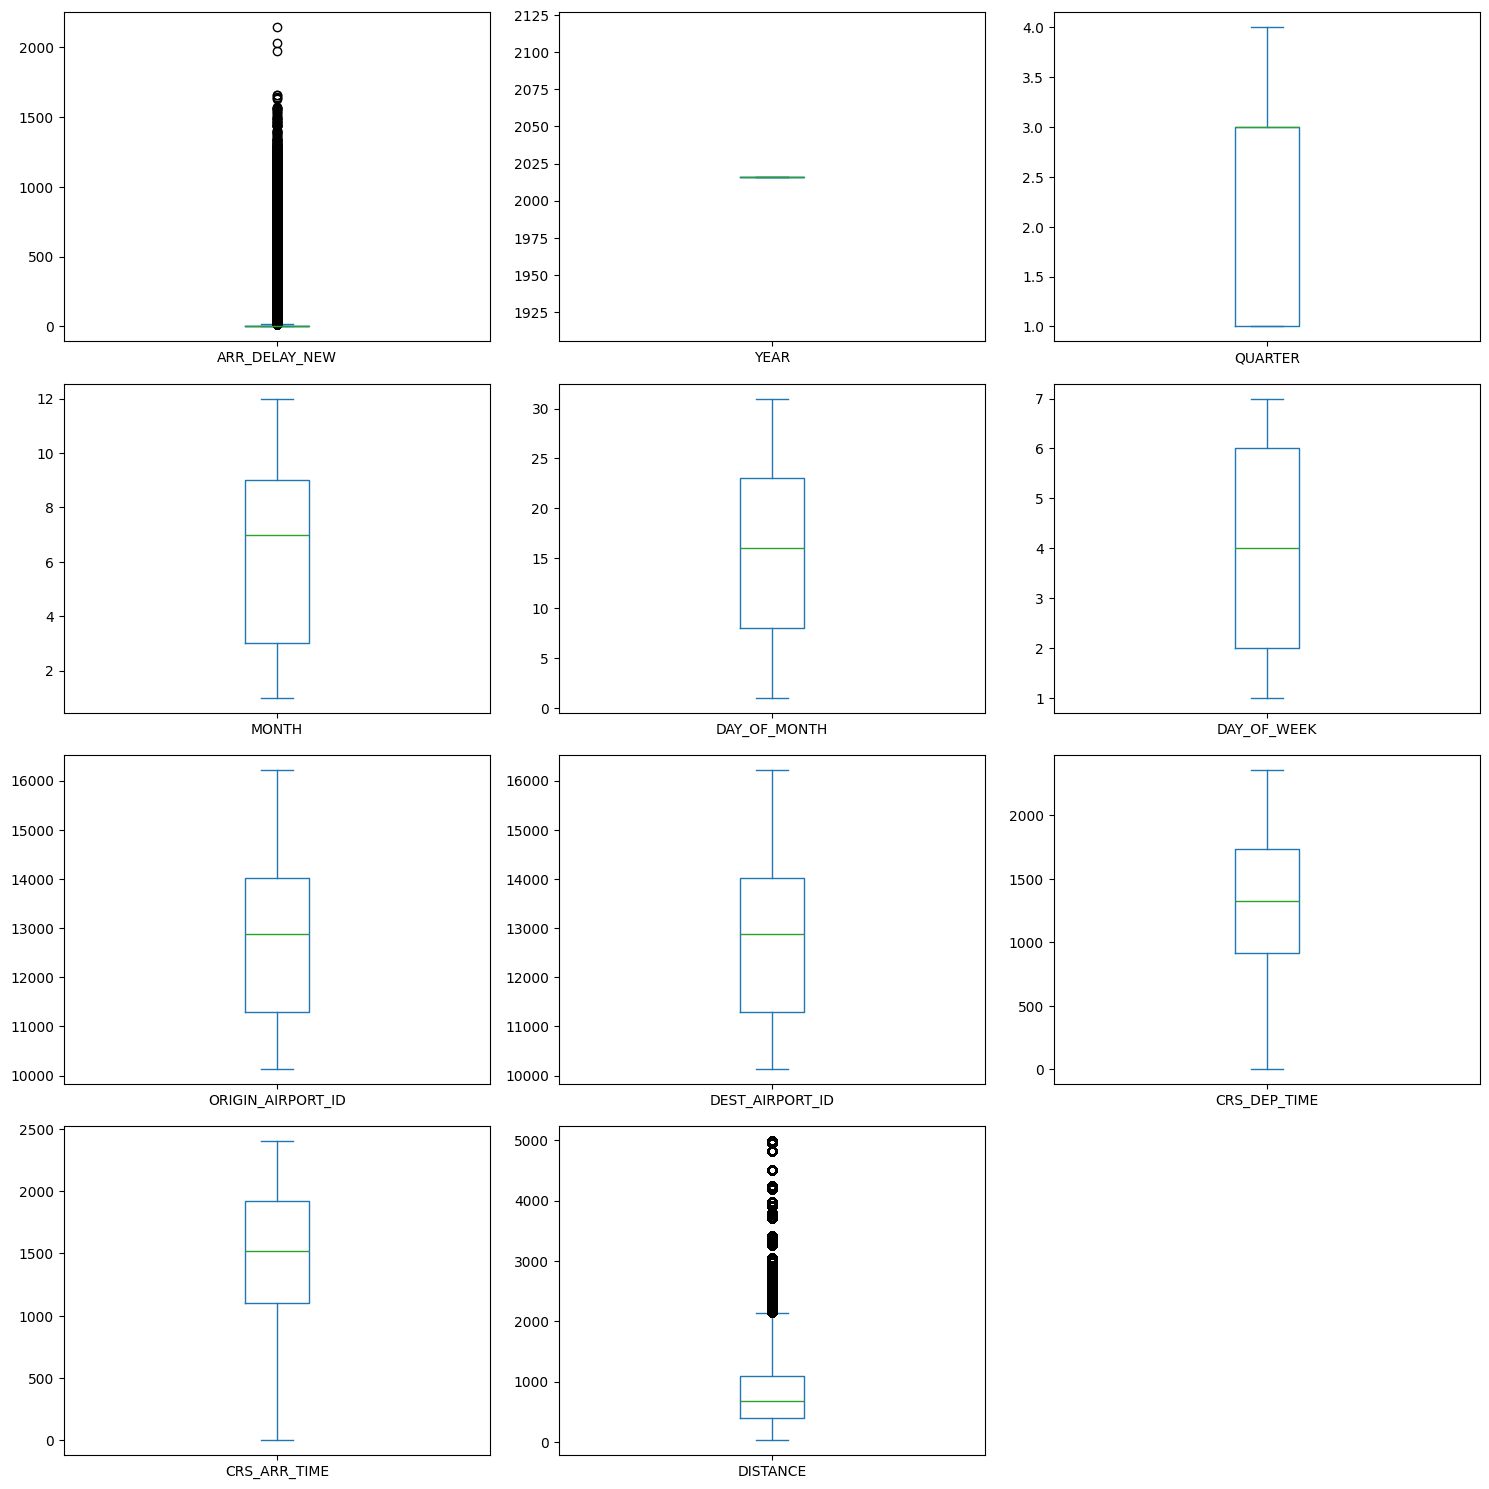

In [5]:
import matplotlib.pyplot as plt
numeric_columns = data_cleaned.select_dtypes(include='number').columns

data_cleaned[numeric_columns].plot(kind='box', subplots=True, layout=(len(numeric_columns) // 3 + 1, 3), figsize=(15, 15), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

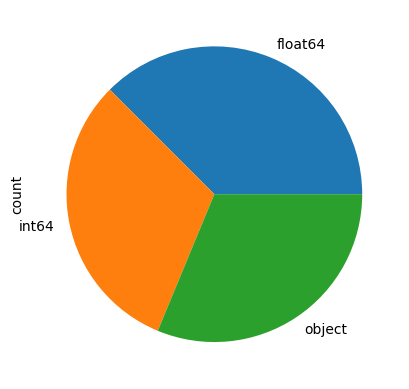

In [6]:
data_cleaned.dtypes.value_counts().plot.pie()

In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556195 entries, 0 to 5556194
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARR_DELAY_NEW      float64
 1   YEAR               int64  
 2   QUARTER            int64  
 3   MONTH              int64  
 4   DAY_OF_MONTH       int64  
 5   DAY_OF_WEEK        int64  
 6   UNIQUE_CARRIER     object 
 7   ORIGIN_AIRPORT_ID  float64
 8   ORIGIN_CITY_NAME   object 
 9   ORIGIN_STATE_ABR   object 
 10  DEST_AIRPORT_ID    float64
 11  DEST_CITY_NAME     object 
 12  DEST_STATE_ABR     object 
 13  CRS_DEP_TIME       float64
 14  CRS_ARR_TIME       float64
 15  DISTANCE           float64
dtypes: float64(6), int64(5), object(5)
memory usage: 678.2+ MB


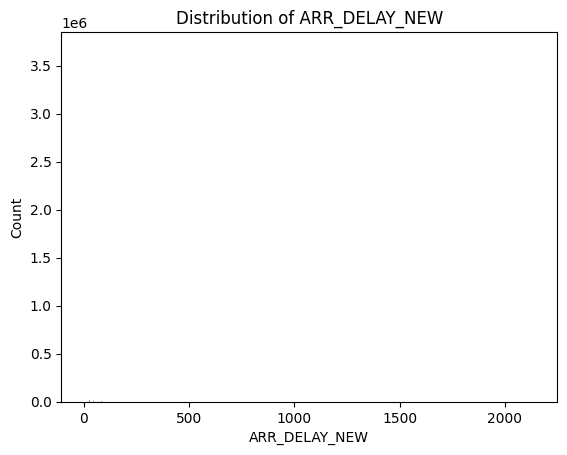

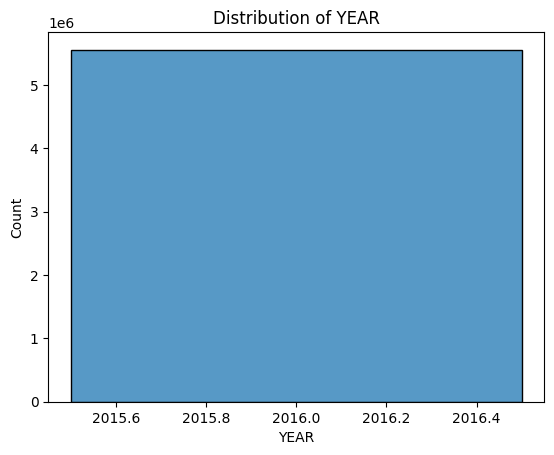

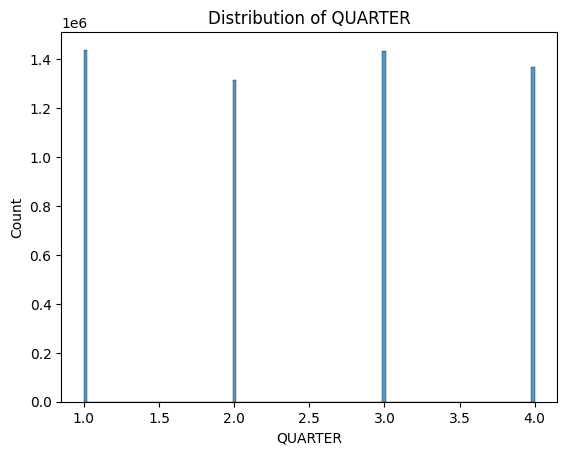

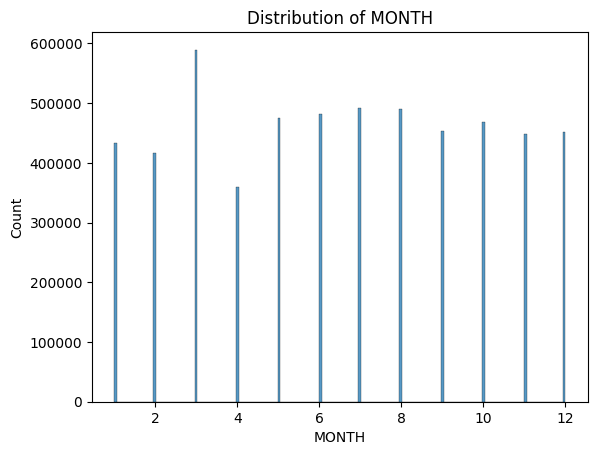

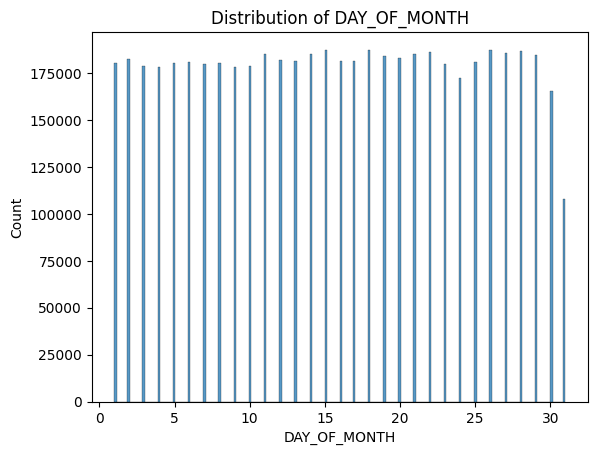

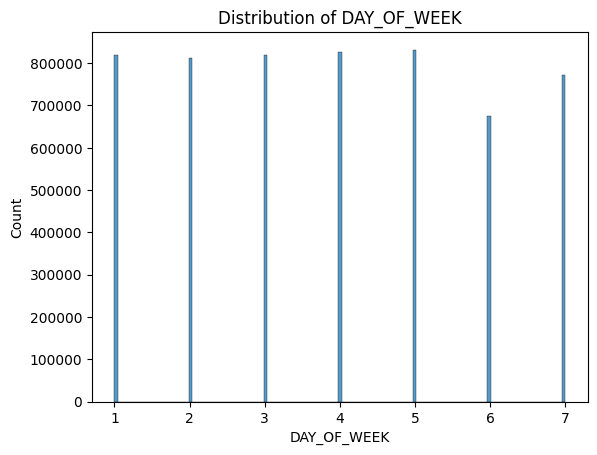

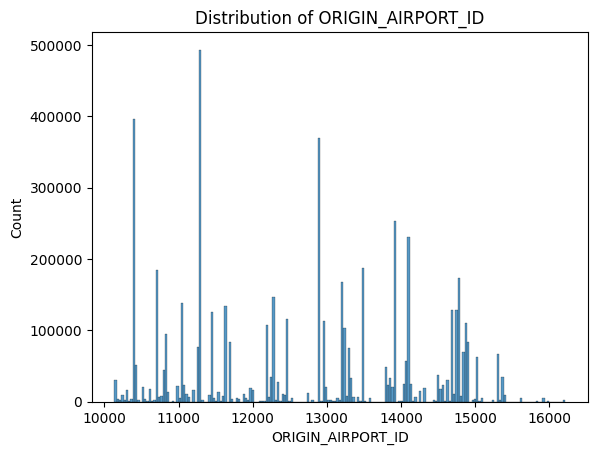

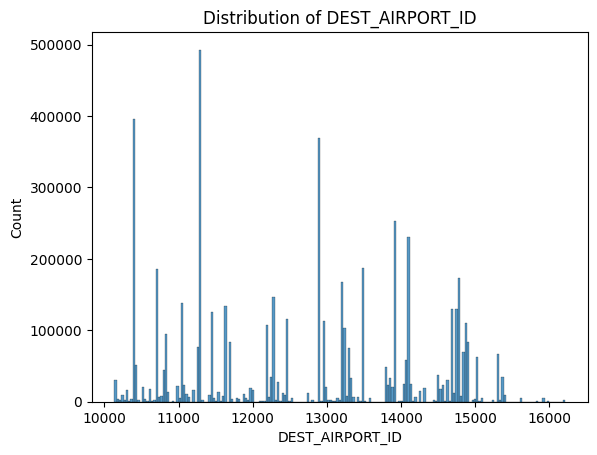

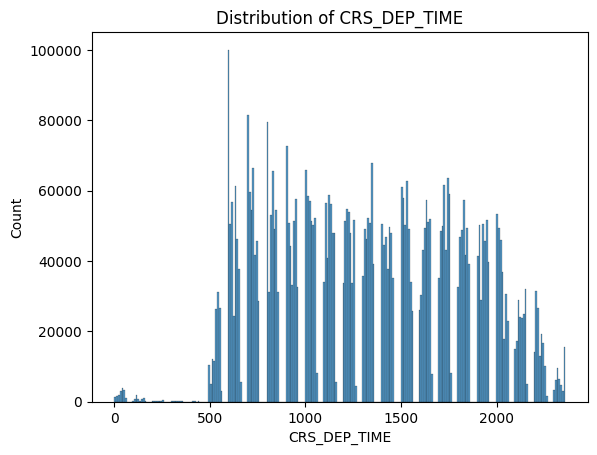

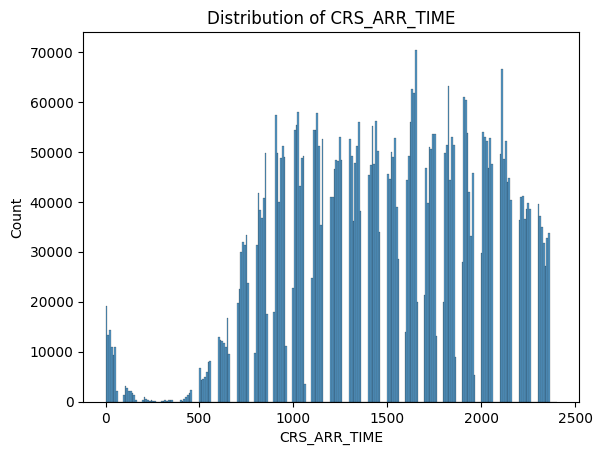

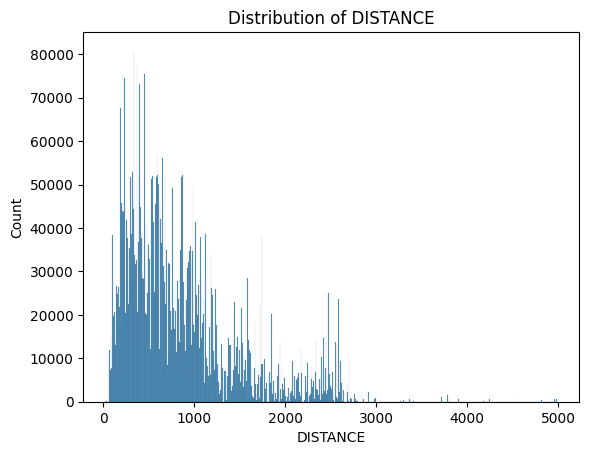

In [11]:
for column in data_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    sns.histplot(data_cleaned[column])
    plt.title(f'Distribution of {column}')
    plt.show()

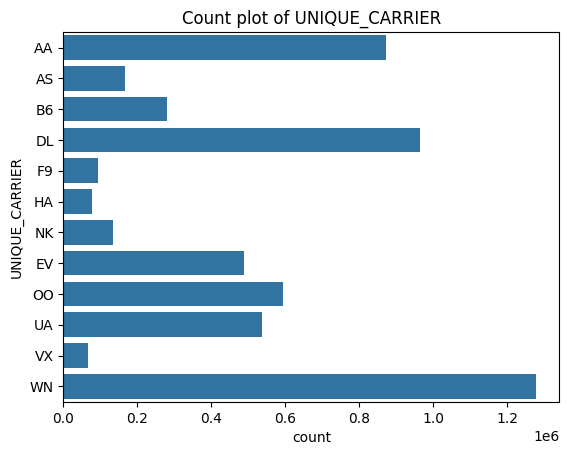

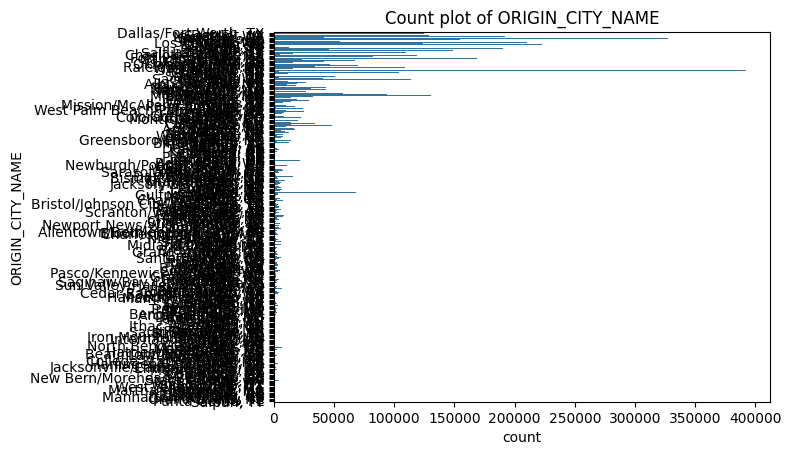

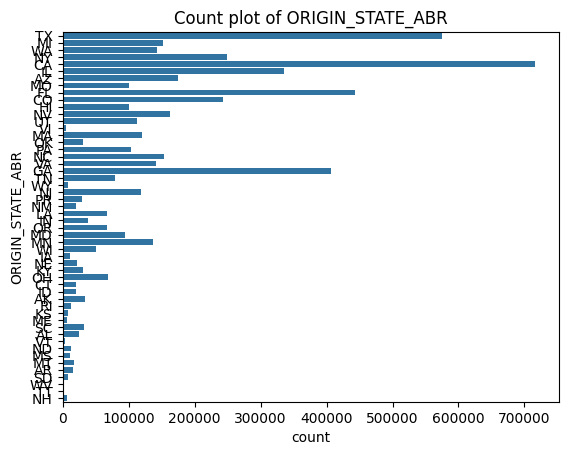

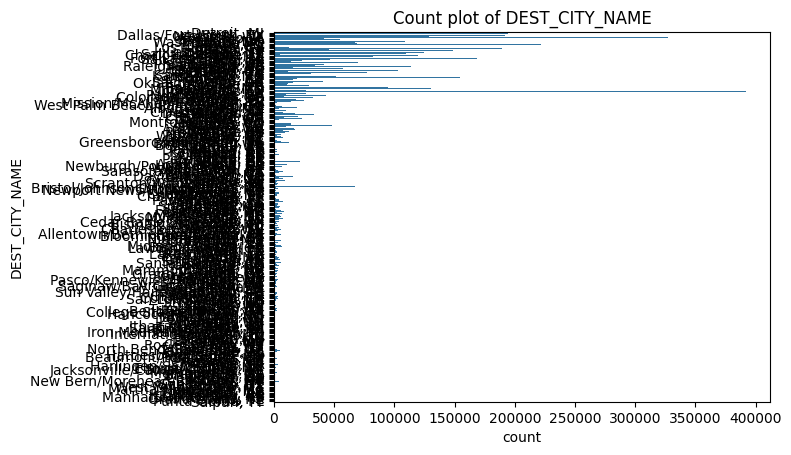

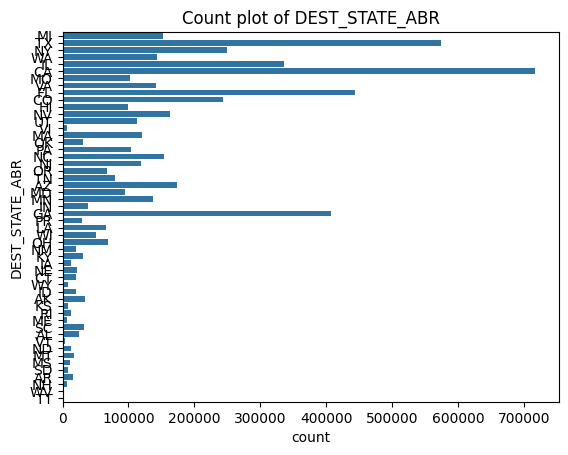

In [12]:
for column in data_cleaned.select_dtypes(include=['object']).columns:
    sns.countplot(y=data_cleaned[column])
    plt.title(f'Count plot of {column}')
    plt.show()

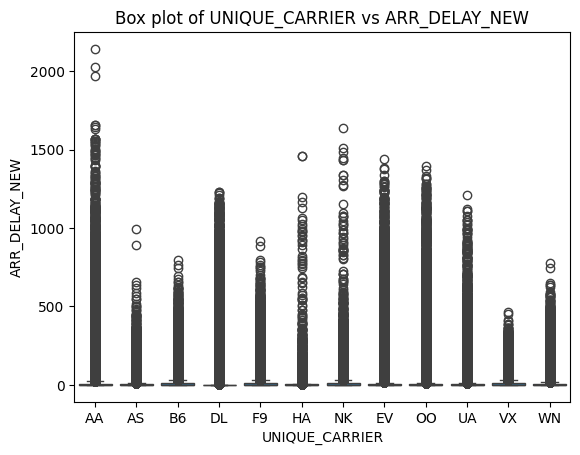

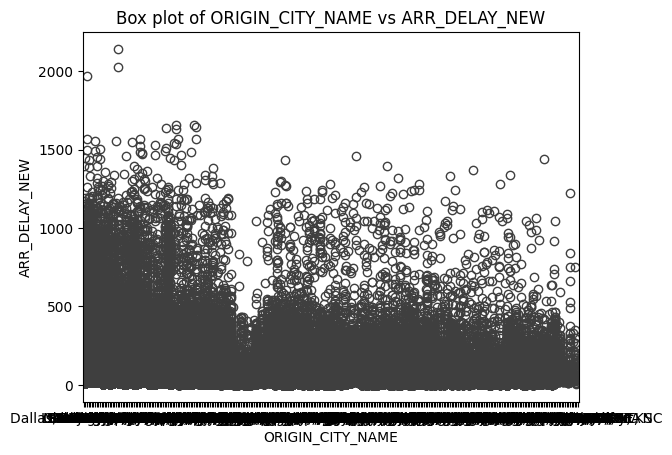

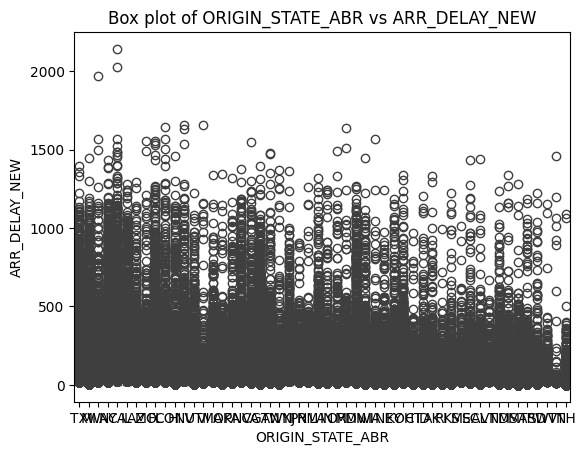

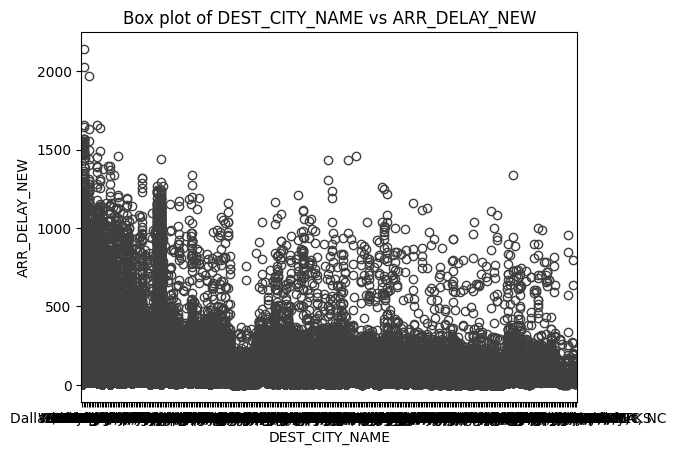

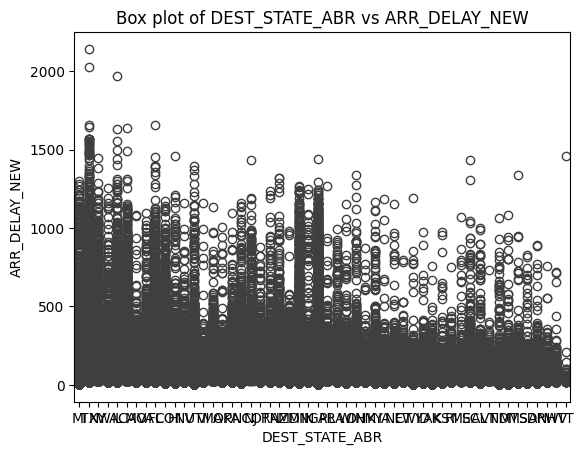

In [13]:
target_column = 'ARR_DELAY_NEW'
for column in data_cleaned.select_dtypes(include=['object']).columns:
    sns.boxplot(x=column, y=target_column, data=data_cleaned)
    plt.title(f'Box plot of {column} vs {target_column}')
    plt.show()

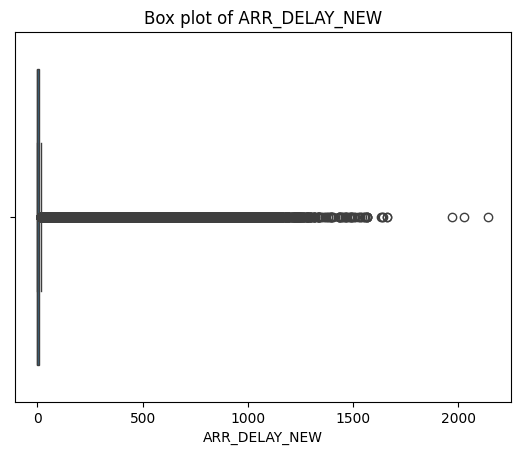

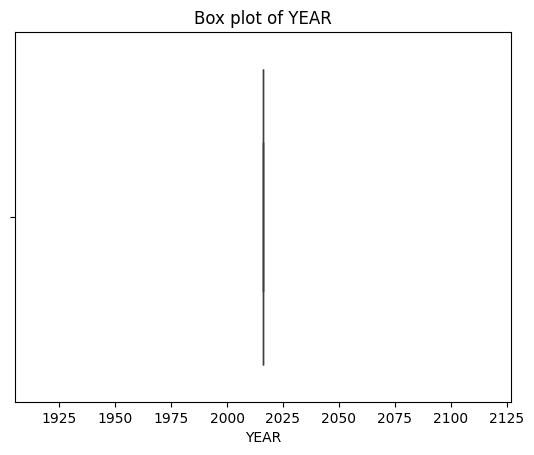

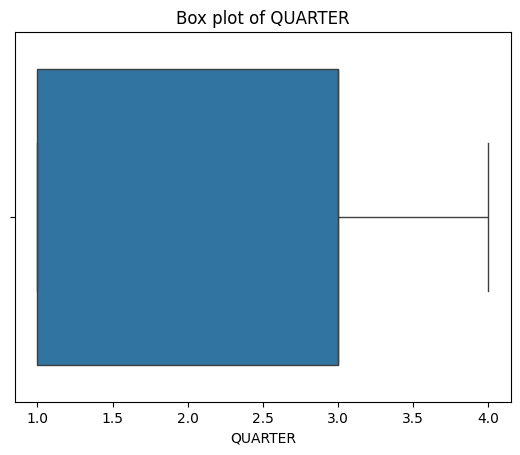

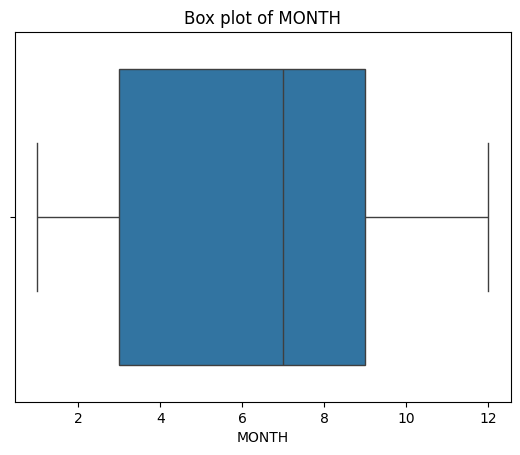

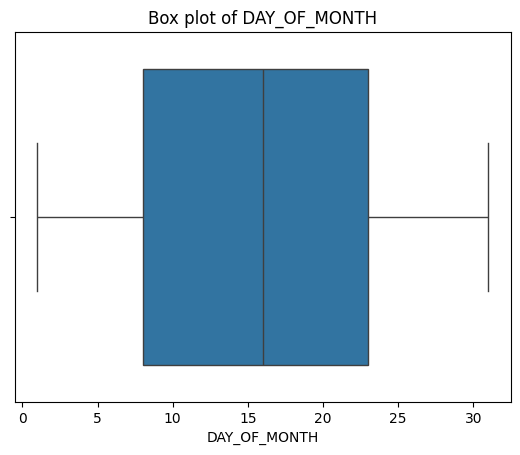

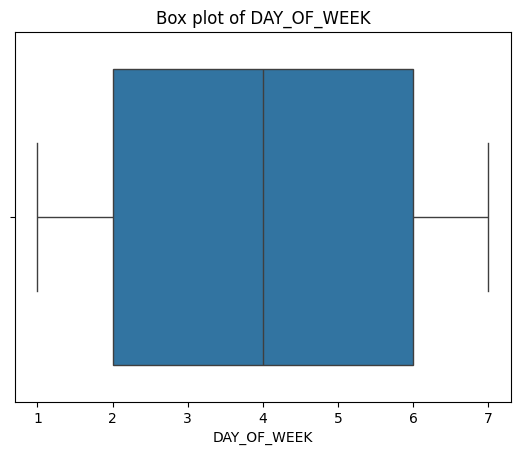

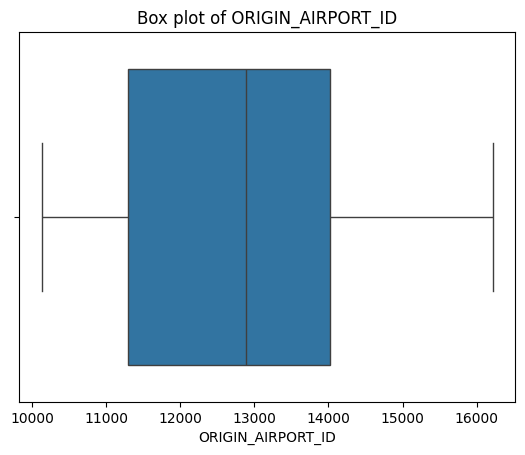

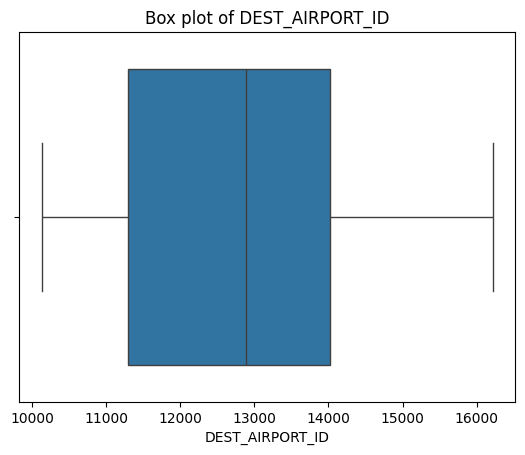

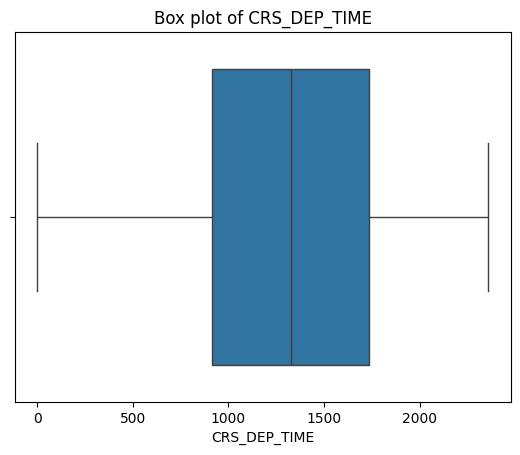

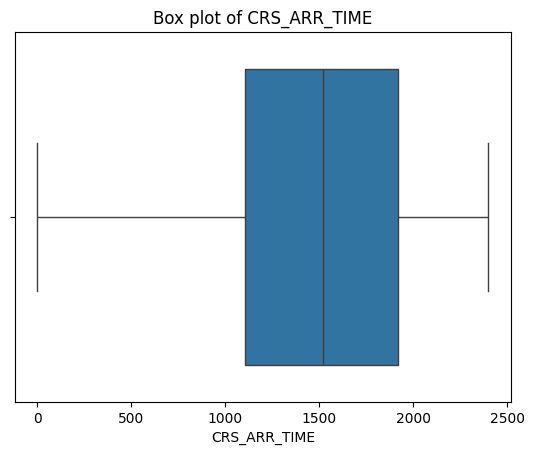

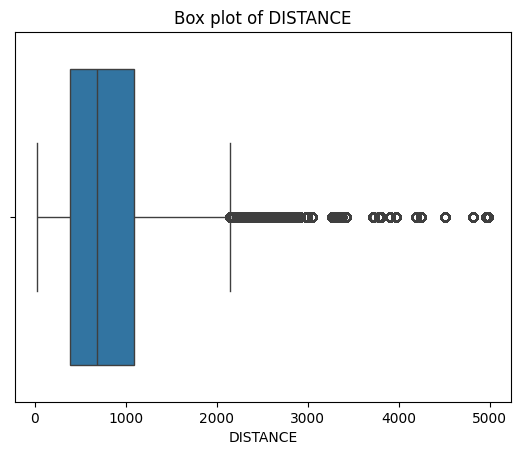

In [14]:
for column in data_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    sns.boxplot(x=data_cleaned[column])
    plt.title(f'Box plot of {column}')
    plt.show()

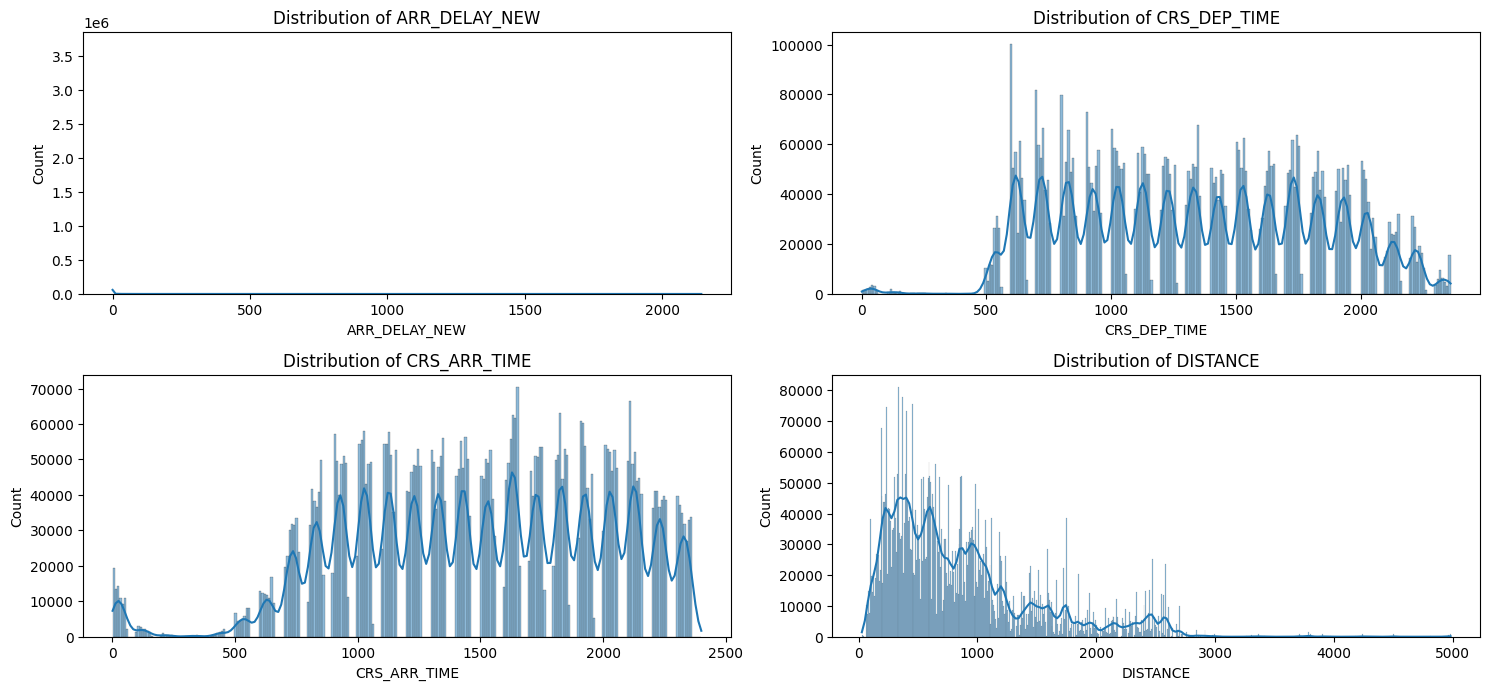

In [15]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.histplot(data_cleaned['ARR_DELAY_NEW'], kde=True)
plt.title('Distribution of ARR_DELAY_NEW')

plt.subplot(3, 2, 2)
sns.histplot(data_cleaned['CRS_DEP_TIME'], kde=True)
plt.title('Distribution of CRS_DEP_TIME')

plt.subplot(3, 2, 3)
sns.histplot(data_cleaned['CRS_ARR_TIME'], kde=True)
plt.title('Distribution of CRS_ARR_TIME')

plt.subplot(3, 2, 4)
sns.histplot(data_cleaned['DISTANCE'], kde=True)
plt.title('Distribution of DISTANCE')

plt.tight_layout()
plt.show()

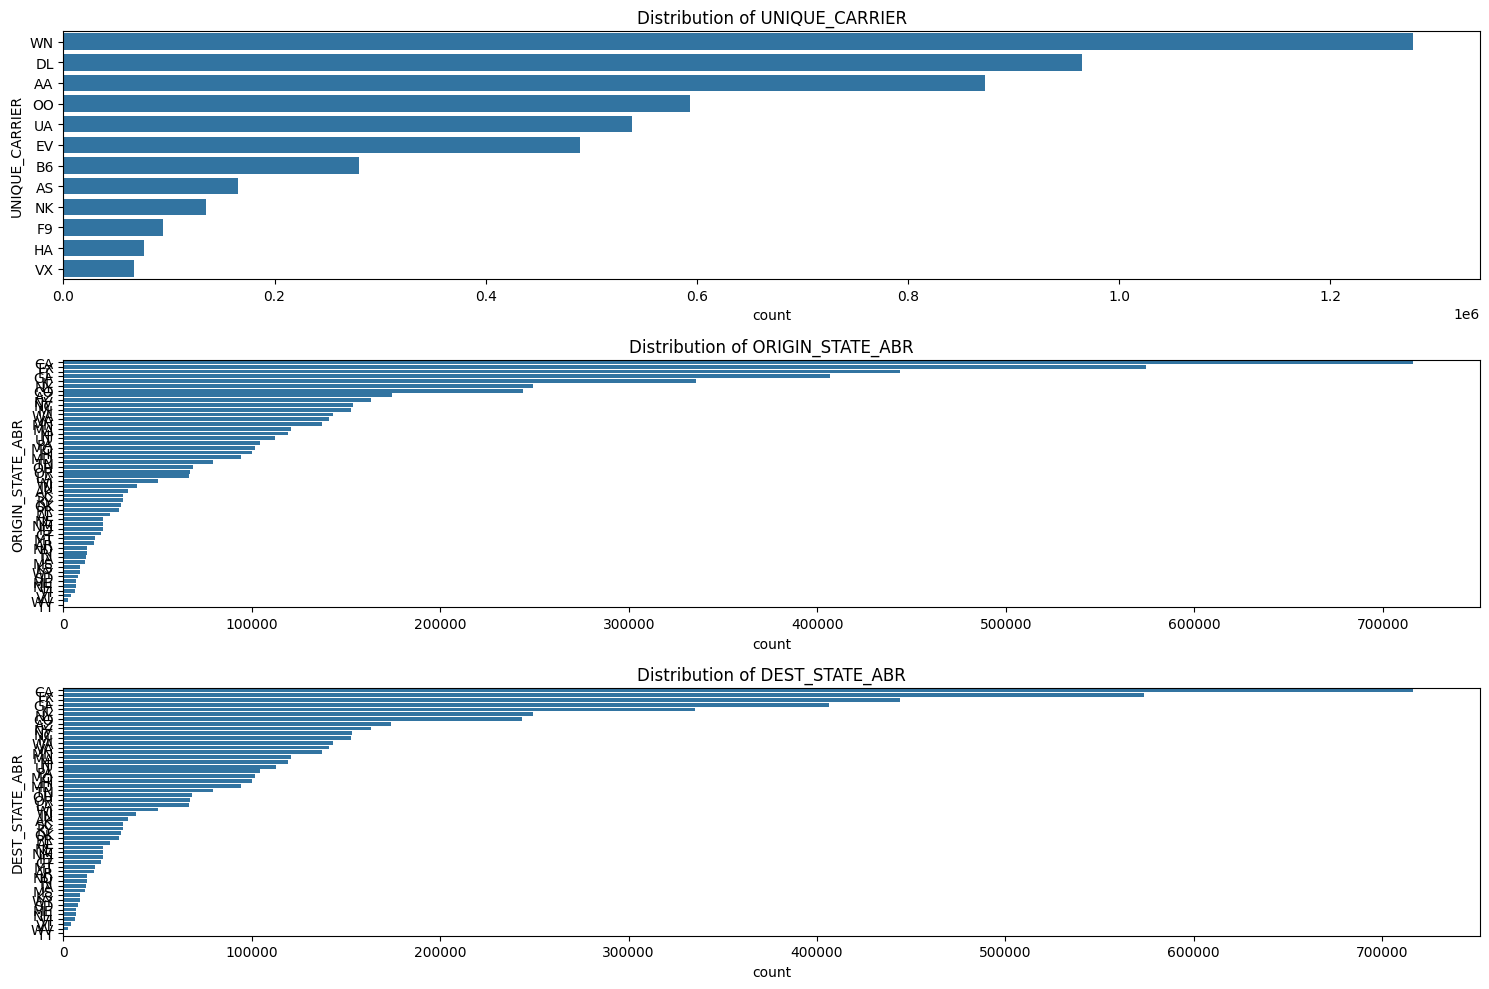

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.countplot(y=data_cleaned['UNIQUE_CARRIER'], order=data_cleaned['UNIQUE_CARRIER'].value_counts().index)
plt.title('Distribution of UNIQUE_CARRIER')

plt.subplot(3, 1, 2)
sns.countplot(y=data_cleaned['ORIGIN_STATE_ABR'], order=data_cleaned['ORIGIN_STATE_ABR'].value_counts().index)
plt.title('Distribution of ORIGIN_STATE_ABR')

plt.subplot(3, 1, 3)
sns.countplot(y=data_cleaned['DEST_STATE_ABR'], order=data_cleaned['DEST_STATE_ABR'].value_counts().index)
plt.title('Distribution of DEST_STATE_ABR')

plt.tight_layout()
plt.show()

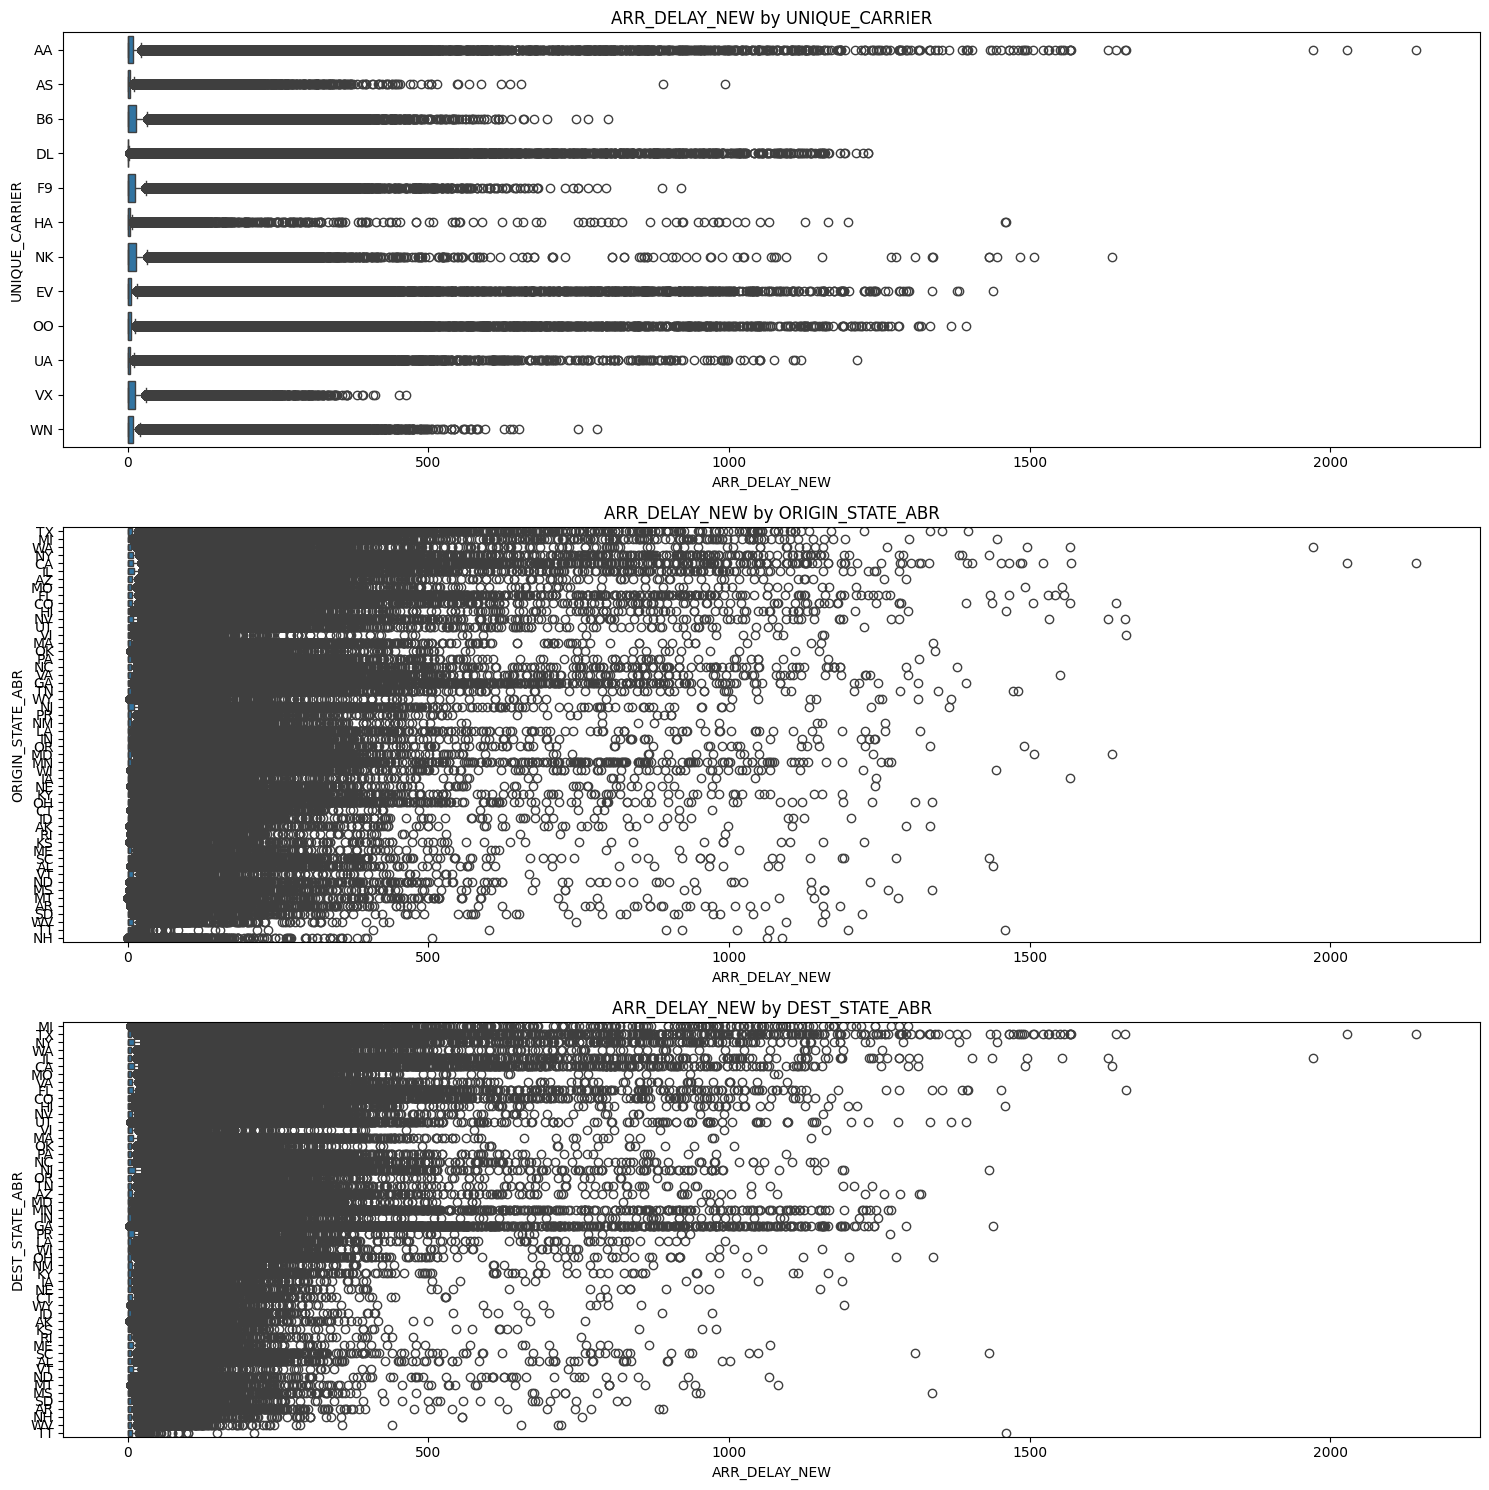

In [18]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x='ARR_DELAY_NEW', y='UNIQUE_CARRIER', data=data_cleaned)
plt.title('ARR_DELAY_NEW by UNIQUE_CARRIER')

plt.subplot(3, 1, 2)
sns.boxplot(x='ARR_DELAY_NEW', y='ORIGIN_STATE_ABR', data=data_cleaned)
plt.title('ARR_DELAY_NEW by ORIGIN_STATE_ABR')

plt.subplot(3, 1, 3)
sns.boxplot(x='ARR_DELAY_NEW', y='DEST_STATE_ABR', data=data_cleaned)
plt.title('ARR_DELAY_NEW by DEST_STATE_ABR')

plt.tight_layout()
plt.show()

# Choix features

## Importance

In [40]:
data_cleaned['ARR_DELAY_NEW'] = (data_cleaned['ARR_DELAY_NEW'] > 0).astype(int)
for column in ['UNIQUE_CARRIER', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_CITY_NAME', 'DEST_STATE_ABR']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

X = data_cleaned.drop(columns=['ARR_DELAY_NEW'])
y = data_cleaned['ARR_DELAY_NEW']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print(feature_importances)

DAY_OF_MONTH         0.309206
DAY_OF_WEEK          0.137379
CRS_ARR_TIME         0.111819
CRS_DEP_TIME         0.101597
MONTH                0.068845
DISTANCE             0.050818
DEST_AIRPORT_ID      0.032541
DEST_CITY_NAME       0.031718
ORIGIN_AIRPORT_ID    0.031120
ORIGIN_CITY_NAME     0.030432
UNIQUE_CARRIER       0.026085
DEST_STATE_ABR       0.025639
ORIGIN_STATE_ABR     0.024864
QUARTER              0.017936
YEAR                 0.000000
dtype: float64


## Colinéarité

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

/Users/matsav/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



Variance Inflation Factor (VIF):
              Feature        VIF
0                YEAR        NaN
1             QUARTER  17.531539
2               MONTH  17.525829
3        DAY_OF_MONTH   1.000063
4         DAY_OF_WEEK   1.001269
5      UNIQUE_CARRIER   1.034189
6   ORIGIN_AIRPORT_ID   2.527879
7    ORIGIN_CITY_NAME   2.582830
8    ORIGIN_STATE_ABR   1.088012
9     DEST_AIRPORT_ID   2.527203
10     DEST_CITY_NAME   2.586319
11     DEST_STATE_ABR   1.087470
12       CRS_DEP_TIME   1.842900
13       CRS_ARR_TIME   1.836114
14           DISTANCE   1.043277


In [42]:
X_reduced = X.drop(columns=['QUARTER', 'MONTH'])

X_scaled_reduced = scaler.fit_transform(X_reduced)
X_scaled_reduced_df = pd.DataFrame(X_scaled_reduced, columns=X_reduced.columns)

vif_data_reduced = pd.DataFrame()
vif_data_reduced['Feature'] = X_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_scaled_reduced_df.values, i) for i in range(X_scaled_reduced_df.shape[1])]

print("\nVariance Inflation Factor (VIF) after feature removal:")
print(vif_data_reduced)

/Users/matsav/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



Variance Inflation Factor (VIF) after feature removal:
              Feature       VIF
0                YEAR       NaN
1        DAY_OF_MONTH  1.000030
2         DAY_OF_WEEK  1.000473
3      UNIQUE_CARRIER  1.032691
4   ORIGIN_AIRPORT_ID  2.527777
5    ORIGIN_CITY_NAME  2.582738
6    ORIGIN_STATE_ABR  1.088001
7     DEST_AIRPORT_ID  2.527102
8      DEST_CITY_NAME  2.586222
9      DEST_STATE_ABR  1.087458
10       CRS_DEP_TIME  1.842861
11       CRS_ARR_TIME  1.836098
12           DISTANCE  1.043243
